# Linear regression

$$ y = \beta_0 + \beta_1 x $$


In [3]:
import numpy as np
import pandas as pd
from scipy import signal, stats
import matplotlib.pyplot as plt

In [4]:
f1 = 'data/tokyo_monthly_t.csv'
f2 = 'data/naha_monthly_t.csv'

df1 = pd.read_csv(f1, index_col=0, parse_dates=True)
df2 = pd.read_csv(f2, index_col=0, parse_dates=True)

# get temperature data from 1995-2019
x = df1.loc['1995-01-01':'1999-12-31', 't']
y = df2.loc['1995-01-01':'1999-12-31', 't']

# estimate anomaly
xa = x.groupby(x.index.month).transform(lambda xx: xx-xx.mean())
ya = y.groupby(y.index.month).transform(lambda xx: xx-xx.mean())

# detrend
xa = signal.detrend(xa)
ya = signal.detrend(ya)

n = len(xa)

# Effective sample size
r1 = np.corrcoef(xa[1:], xa[:-1])[0, 1]
r2 = np.corrcoef(ya[1:], ya[:-1])[0, 1]
n_eff = n * (1 - r1*r2) / (1 + r1*r2)

print(f'Number of samples = {n}')
print(f'Effective sample size: {n_eff:.1f}')

Number of samples = 60
Effective sample size: 50.0


# [np.linalg.lstq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)

Solves 
$$y = Ap = \begin{bmatrix} x & 1 \end{bmatrix} \begin{bmatrix} m \\ c \end{bmatrix} = mx + c $$

where 
$ A = \begin{bmatrix} x & 1 \end{bmatrix} $,
$ p = \begin{bmatrix} m \\ c \end{bmatrix} $

In [5]:
A = np.stack([xa, np.ones(len(x))], axis=-1)
print(f'{A.shape = :}')
print(A[:5])

A.shape = (60, 2)
[[ 0.54065574  1.        ]
 [ 0.52165046  1.        ]
 [-0.33735482  1.        ]
 [ 0.6636399   1.        ]
 [ 0.22463462  1.        ]]


In [6]:
p, res, rnk, s = np.linalg.lstsq(A, ya, rcond=None)

print(f'p = {p}')
print(f'Sums of squared residuals = {res}')
print(f'Rank of matrix A (number of linearly independent columns): {rnk}')
print(f'Singular values of A: {s}')

p = [4.23977121e-01 2.72325435e-16]
Sums of squared residuals = [32.85975271]
Rank of matrix A (number of linearly independent columns): 2
Singular values of A: [7.74596669 6.01765689]


Reconstruct y

In [7]:
ya_recon = A @ p

# sum of squared residuals
print(f'Sums of squared residuals = {((ya - ya_recon)**2).sum()}')

Sums of squared residuals = 32.859752705104384


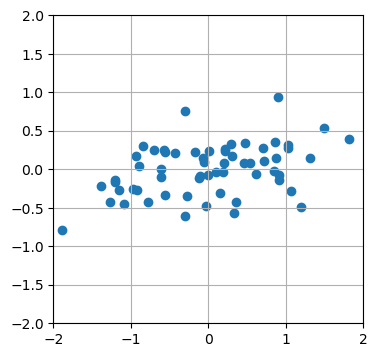

In [8]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(ya, ya_recon)
ax.set(xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

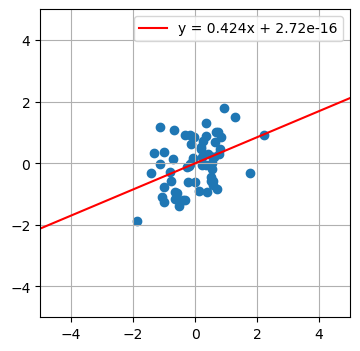

In [9]:
xx = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(xa, ya)
ax.plot(
    xx, xx * p[0] + p[1], c='r',
    label=f'y = {p[0]:.3g}x + {p[1]:.3g}'
)
        
ax.grid()
ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.legend()